INITIALIZATION

In [ ]:
%pip install pandas matplotlib numpy wordcloud networkx

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from wordcloud import WordCloud
import networkx as nx

LOADING CLEANED DATA

ANALYSIS OF COMMITS

In [237]:
# Chung
commits_df = pd.read_csv('data_cleaned/commits.csv', parse_dates=['date'])
print(f'Số commits trong năm 2023: {commits_df.shape[0]}')
print(f'Số commits trung bình trong ngày: {commits_df.shape[0] / 365:.2f}')

Số commits trong năm 2023: 1349
Số commits trung bình trong ngày: 3.70


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12208\2516810392.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  commits_per_day = commits_df['date'].dt.to_period('D').value_counts().sort_index()


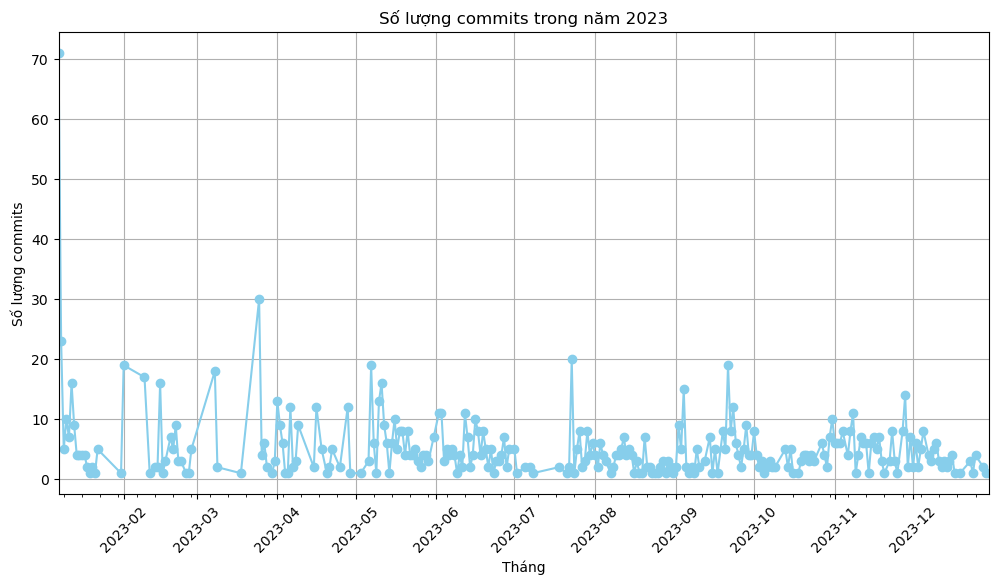

In [238]:
# Phân tích số commits theo thời gian

# Tính số commits theo ngày
commits_per_day = commits_df['date'].dt.to_period('D').value_counts().sort_index()
fig, ax = plt.subplots(figsize=(12, 6))
commits_per_day.plot(kind='line', color='skyblue', marker='o', ax=ax)

plt.title('Số lượng commits trong năm 2023')
plt.xlabel('Tháng')
plt.ylabel('Số lượng commits')

# Chỉnh cột x theo tháng
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Vẽ biểu đồ đường
plt.grid(True)
plt.show()

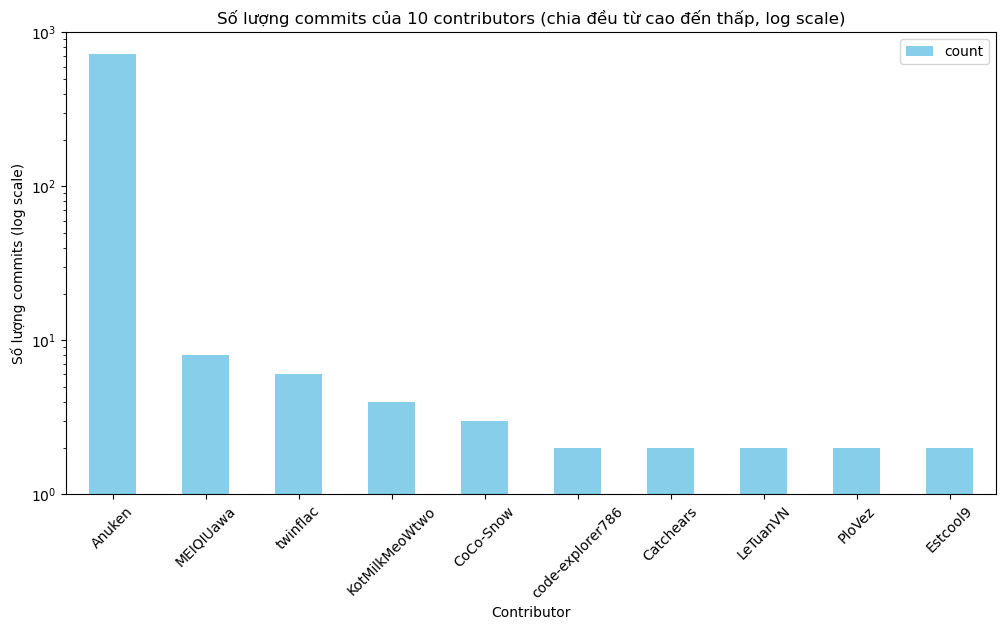

In [228]:
# Tính số commits theo contributors
commits_per_contributor = pd.read_csv('data_cleaned/commits_per_contributor.csv', index_col='author')

# Chọn 10 người cách đều trong danh sách
indices = np.linspace(0, len(commits_per_contributor) - 1, 10).astype(int)
selected_contributors = commits_per_contributor.iloc[indices]

# Vẽ biểu đồ
selected_contributors.plot(kind='bar', figsize=(12, 6), color='skyblue', log=True)
plt.title('Số lượng commits của 10 contributors (chia đều từ cao đến thấp, log scale)')
plt.xlabel('Contributor')
plt.ylabel('Số lượng commits (log scale)')
plt.xticks(rotation=45)
plt.show()


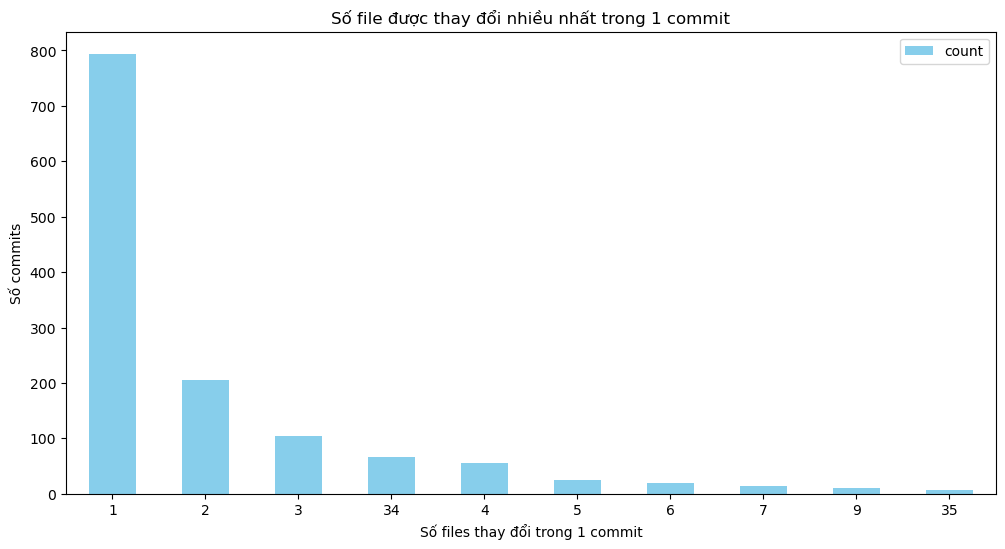

In [224]:
# Phân tích commits theo số files thay đổi

files_changed_per_commit_df = pd.read_csv('data_cleaned/files_changed_per_commit.csv')

files_changed_per_commit_df.iloc[:10].plot(kind='bar', x='file', y='count', figsize=(12, 6), color='skyblue')
plt.title('Số file được thay đổi nhiều nhất trong 1 commit')
plt.xlabel('Số files thay đổi trong 1 commit')
plt.ylabel('Số commits')
plt.xticks(rotation = 0)
plt.show()

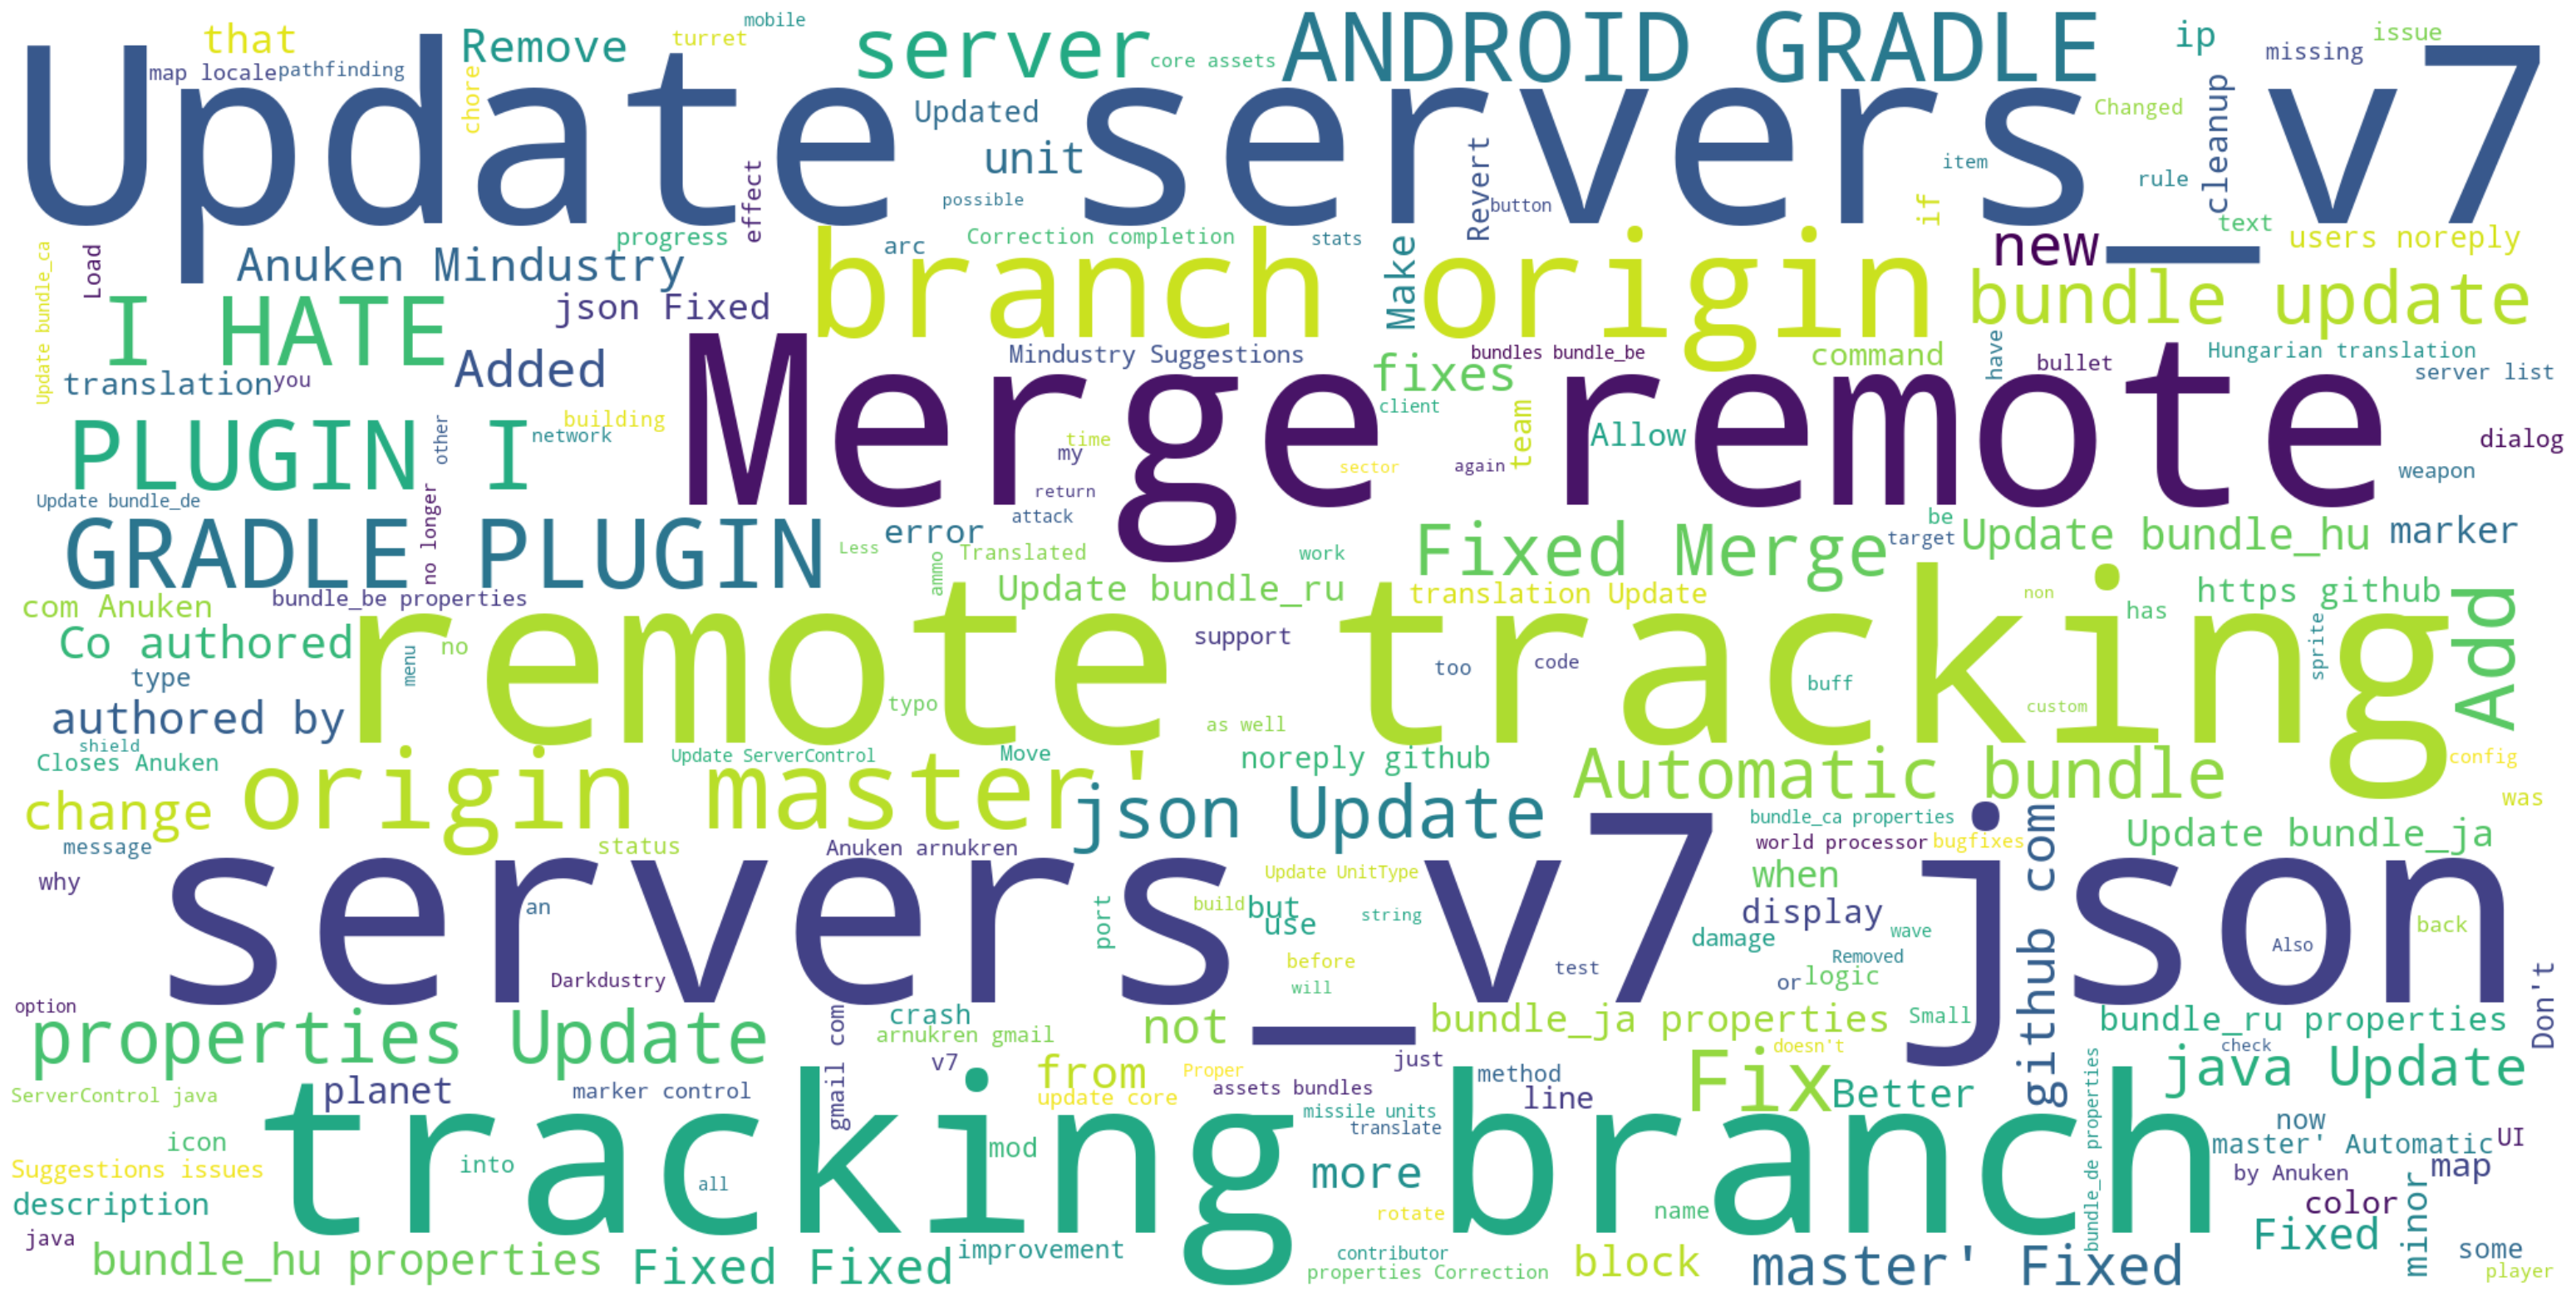

In [11]:
# Phân tích các từ trong commit messages

all_messages = ' '.join(commits_df['message'])
wordcloud = WordCloud(width=2000, height=1000, background_color='white', colormap='viridis', 
                      stopwords=set(['the', 'and', 'to', 'of', 'in', 'a', 'for', 'on', 'with', 'is', 'this', 'it'])).generate(all_messages)

# Vẽ ảnh
plt.figure(figsize=(40, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

ANALYSIS OF CONTRIBUTORS

In [221]:
# Chung
contributors_df = pd.read_csv('data_cleaned/contributors.csv')
total_contributors = contributors_df.shape[0]
print(f'Tổng số contributors: {total_contributors}')

# Đóng góp nhiều nhất
top_contributor = contributors_df.loc[contributors_df['commits'].idxmax()]
top_contributor_name = top_contributor['login']
top_contributor_commits = top_contributor['commits']
top_contributor_percent = top_contributor['percent_contribution']

print(f'Người đóng góp nhiều nhất: {top_contributor_name}. Đã đóng góp {top_contributor_commits} commits, chiếm {top_contributor_percent:.2f}% trong tổng số commits.')


Tổng số contributors: 381
Người đóng góp nhiều nhất: Anuken. Đã đóng góp 12032 commits, chiếm 70.44% trong tổng số commits.


In [219]:
# Tính khoảng thời gian hoạt động của mỗi contributor
activity_periods_df = pd.read_csv('data_cleaned/activity_periods.csv', index_col= 'author')
print(f'Thời gian hoạt động trung bình: {activity_periods_df['activity_duration'].mean():.2f} giờ')

# Người hoạt động đều đặn nhất (nhiều ngày hoạt động nhất)
most_regular_contributor = activity_periods_df['activity_duration'].idxmax()
most_regular_duration = activity_periods_df['activity_duration'].max()

print(f'Người hoạt động đều đặn nhất: {most_regular_contributor}')
print(f'Thời gian hoạt động: {most_regular_duration:.2f} giờ')

# Người có thời gian đóng góp dài nhất
longest_active_contributor = activity_periods_df['max'].idxmax()
longest_active_duration = activity_periods_df.loc[longest_active_contributor, 'activity_duration']

print(f'Người có thời gian đóng góp dài nhất: {longest_active_contributor:}')
print(f'Thời gian hoạt động: {longest_active_duration:.2f} giờ')


Thời gian hoạt động trung bình: 1816.14 giờ
Người hoạt động đều đặn nhất: Anuken
Thời gian hoạt động: 8553.85 giờ
Người có thời gian đóng góp dài nhất: Anuken
Thời gian hoạt động: 8553.85 giờ


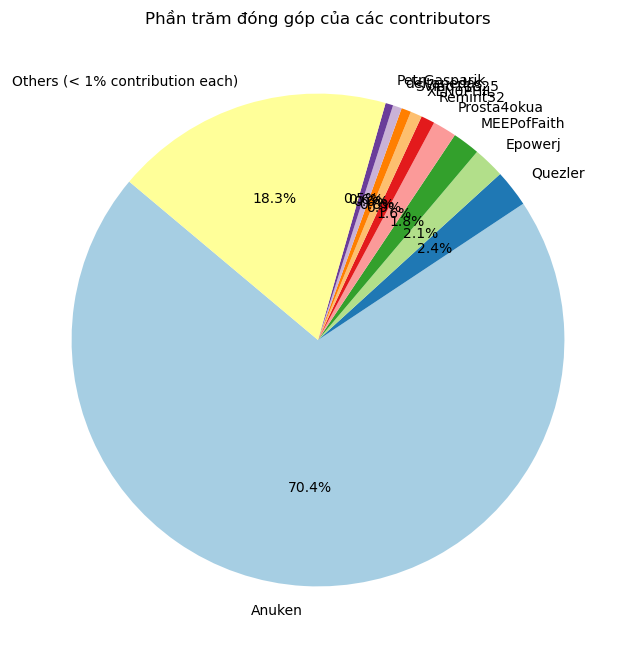

In [55]:
# Phân tích contributors theo đóng góp

# Lấy top 10 contributors
top_contributors = contributors_df.nlargest(10, 'commits')

# Tính phần còn lại của các contributors
other_contribution = 100 - top_contributors['percent_contribution'].sum()

# Thêm "Other" vào dữ liệu top contributors
other_row = pd.DataFrame({'login': ['Others'], 'percent_contribution': [other_contribution]})
top_contributors = pd.concat([top_contributors, other_row], ignore_index=True)

# Vẽ biểu đồ quạt
plt.figure(figsize=(10, 8))
plt.pie(top_contributors['percent_contribution'], labels=top_contributors['login'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Phần trăm đóng góp của các contributors')
plt.show()

In [199]:
# Phân tích contributors theo địa điểm

location_counts = pd.read_csv('data_cleaned/location_counts.csv')

location_counts.iloc[:20]

location  contributors_count
0            Germany                   6
1             Poland                   4
2            Ukraine                   3
3             Russia                   3
4     Czech Republic                   3
5               Mars                   3
6          Australia                   2
7      United States                   2
8             Taiwan                   2
9             Vienna                   2
10            Россия                   2
11         Venezuela                   2
12             Japan                   2
13             China                   2
14  right behind you                   2
15             Earth                   2
16       UK, Bristol                   1
17        South Pole                   1
18         among you                   1
19    Ankara, Turkey                   1

ANALYSIS OF ISSUES

In [239]:
# Tổng số issues mở và đóng
issues_df = pd.read_csv('data_cleaned/issues.csv', parse_dates=['created_at', 'closed_at'])
closed_issues_df = pd.read_csv('data_cleaned/closed_issues.csv')

total_issues = issues_df.shape[0]
closed_issues = issues_df[issues_df['state'] == 'closed'].shape[0]
print(f'Tổng số issues: {total_issues}')
print(f'Tổng số issues đã đóng: {closed_issues}')


Tổng số issues: 4331
Tổng số issues đã đóng: 4330


In [197]:
# Thời gian trung bình để giải quyết một issue
average_resolution_time = closed_issues_df['resolution_time'].mean()
print(f'Thời gian trung bình để giải quyết một issue: {average_resolution_time:.2f} giờ')

Thời gian trung bình để giải quyết một issue: 67.76 giờ


In [196]:
# Phân tích issues theo nhãn

label_counts_df = pd.read_csv('data_cleaned/label_counts.csv')

label_counts_df


label  count
0             ['bug']   3134
1       ['unlabeled']   1170
2  ['bug', 'wontfix']      9
3      ['a disgrace']      8
4     ['help wanted']      8
5           ['draft']      2

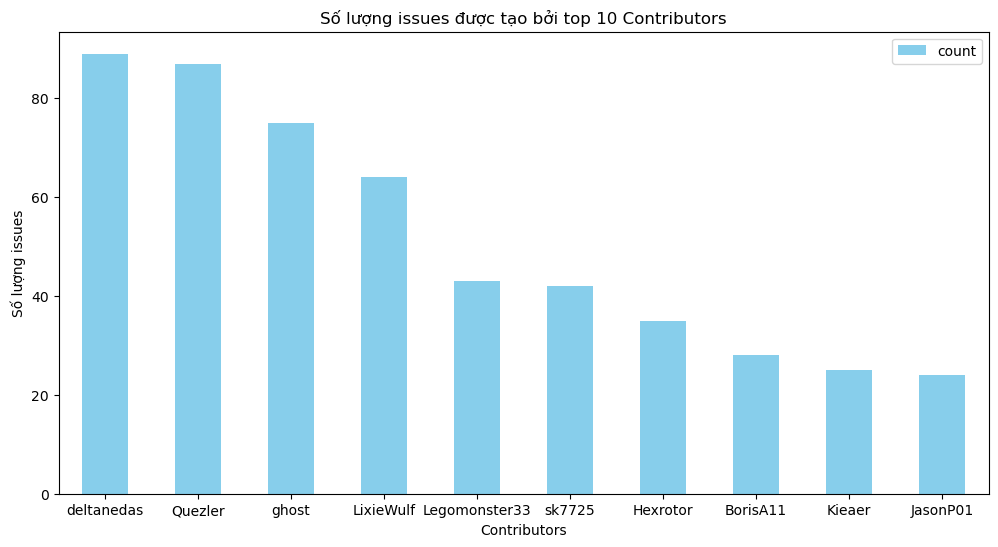

In [193]:
# Phân tích issues theo contributors
issues_per_contributor = pd.read_csv('data_cleaned/issues_per_contributor.csv', index_col='contributor')

# Chọn 10 contributors đã mở số issues nhiều nhất
top_10_contributors = issues_per_contributor.head(10)

# Vẽ biểu đồ cột
top_10_contributors.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Số lượng issues được tạo bởi top 10 Contributors')
plt.xlabel('Contributors')
plt.ylabel('Số lượng issues')
plt.xticks(rotation= 0)
plt.show()

ANALYSIS OF PULL REQUESTS

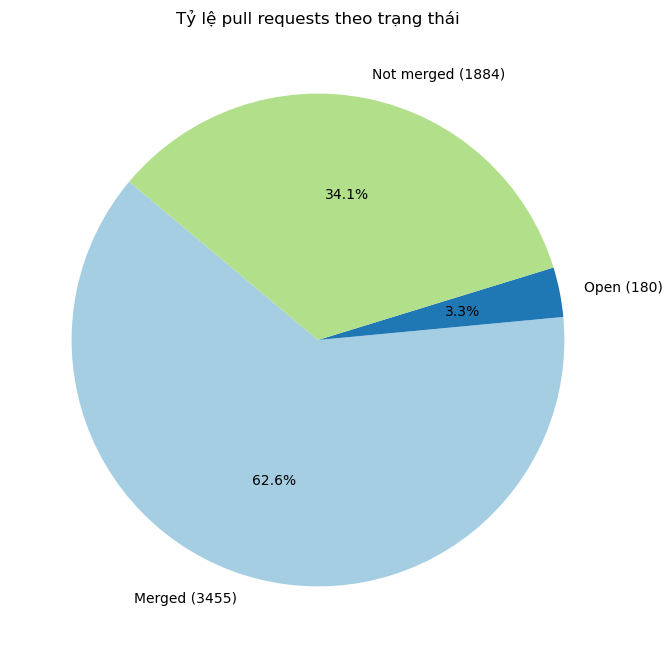

In [240]:
# Tổng số pull requests tạo ra và được merge
pull_requests_df = pd.read_csv('data_cleaned/pull_requests.csv', parse_dates=['created_at', 'merged_at', 'closed_at'])
merged_pull_requests_df = pd.read_csv('data_cleaned/merged_pull_requests.csv')
unmerged_pull_requests_df = pd.read_csv('data_cleaned/unmerged_pull_requests.csv')

total_pull_requests = pull_requests_df.shape[0]
merged_pull_requests = merged_pull_requests_df.shape[0]
unmerged_pull_requests = unmerged_pull_requests_df.shape[0]
open_pull_requests = total_pull_requests - unmerged_pull_requests - merged_pull_requests

pull_requests_status_data = pd.DataFrame({
    'status': ['Merged', 'Open', 'Not merged'],
    'count': [merged_pull_requests, open_pull_requests, unmerged_pull_requests]
})

# Vẽ biểu đồ quạt
plt.figure(figsize=(8, 8))
plt.pie(pull_requests_status_data['count'], labels=[f'{row["status"]} ({row["count"]})' for _, row in pull_requests_status_data.iterrows()], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Tỷ lệ pull requests theo trạng thái')
plt.show()


In [241]:
# Tính thời gian trung bình để merge
average_time_to_merge = merged_pull_requests_df['time_to_merge'].mean()
print(f'Thời gian trung bình để merge một pull request: {average_time_to_merge:.2f} giờ')

Thời gian trung bình để merge một pull request: 163.00 giờ


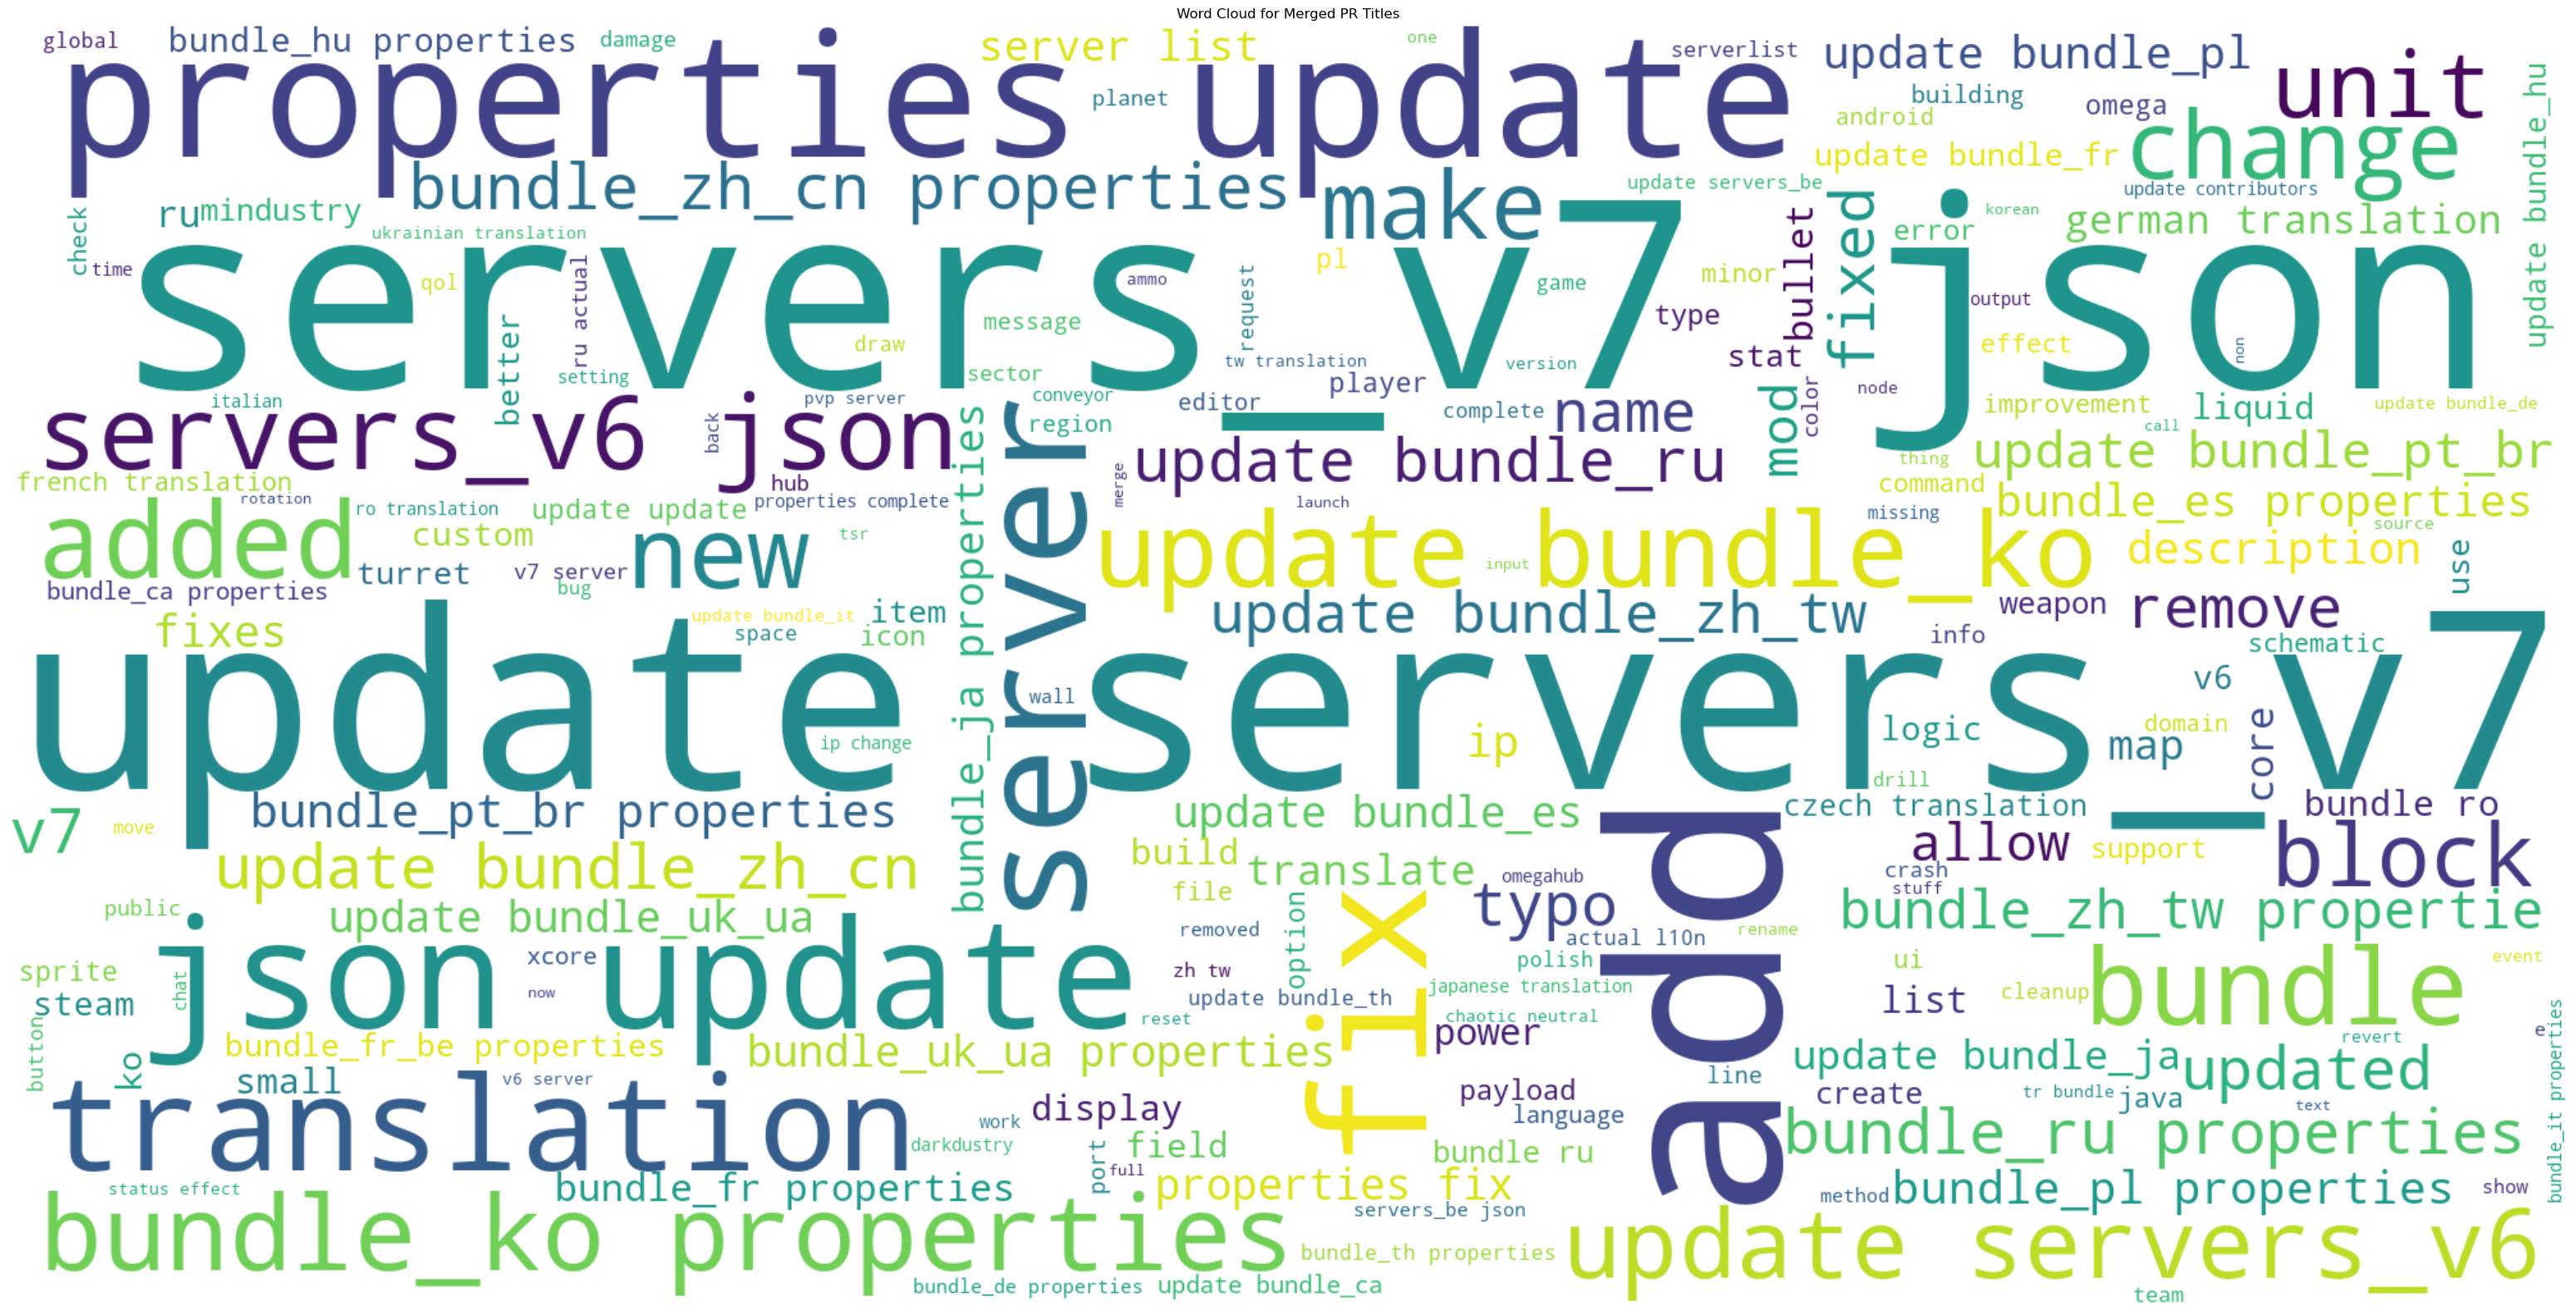

In [242]:
merged_titles = ' '.join(merged_pull_requests_df['title'].dropna().str.lower())

# Tạo word cloud cho merged PRs titles
merged_wordcloud = WordCloud(width=2000, height=1000, background_color='white', colormap='viridis').generate(merged_titles)

# Hiển thị word cloud cho merged PRs titles
plt.figure(figsize=(40, 20))
plt.imshow(merged_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Merged PR Titles')
plt.axis('off')
plt.show()


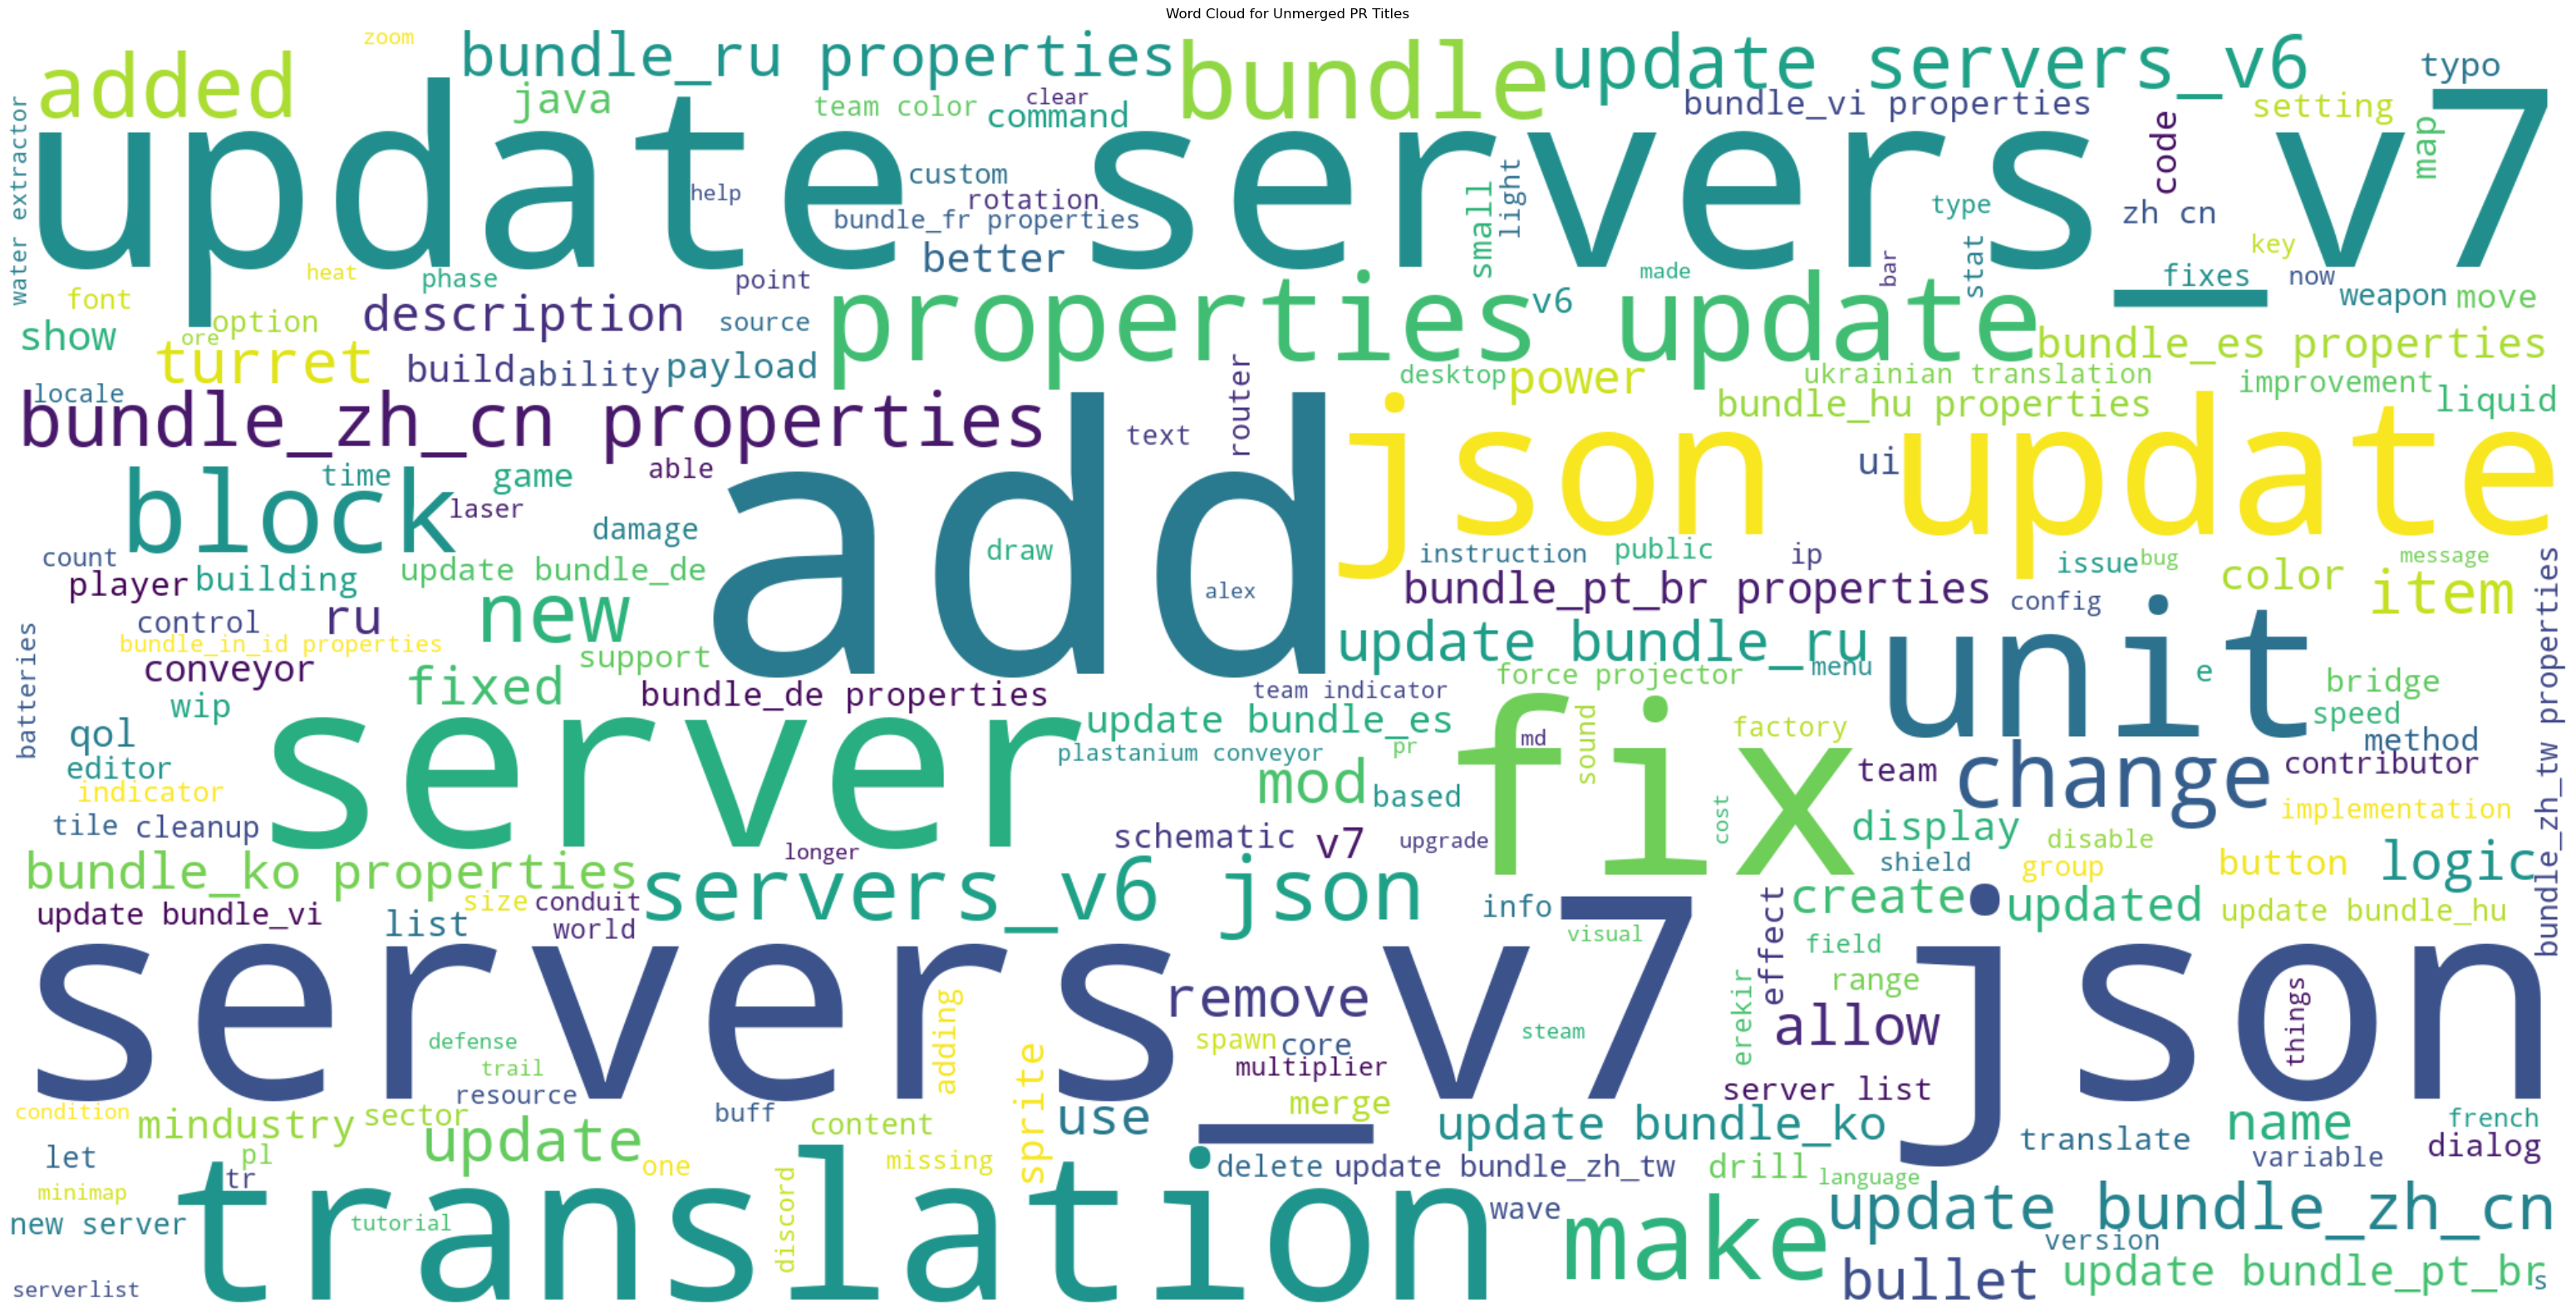

In [191]:
unmerged_titles = ' '.join(unmerged_pull_requests_df['title'].dropna().str.lower())

# Tạo word cloud cho unmerged PRs titles
unmerged_wordcloud = WordCloud(width=2000, height=1000, background_color='white', colormap='viridis').generate(unmerged_titles)

# Hiển thị word cloud cho unmerged PRs titles
plt.figure(figsize=(40, 20))
plt.imshow(unmerged_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Unmerged PR Titles')
plt.axis('off')
plt.show()

ANALYSIS OF PROGRAMMING LANGUAGES

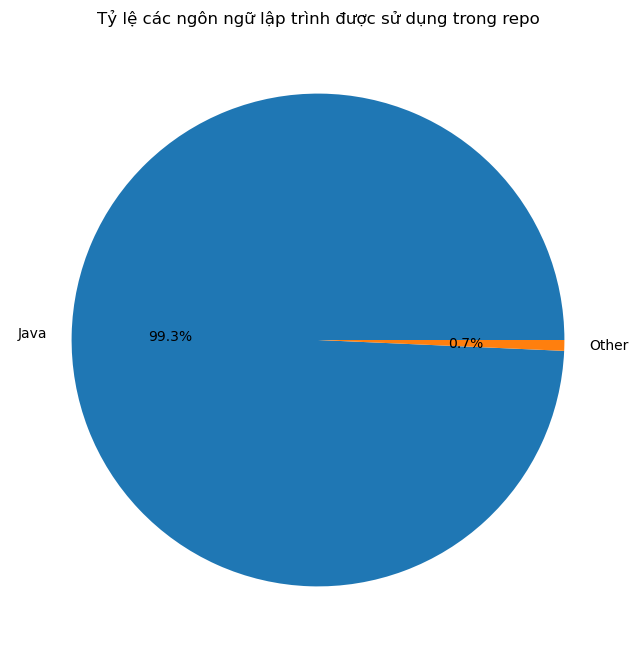

In [187]:
# Vẽ biểu đồ quạt thể hiện tỷ lệ các ngôn ngữ lập trình
languages_df = pd.read_csv('data_cleaned/languages.csv')
languages_df.set_index('language', inplace=True)
languages_df.plot.pie(y='lines', autopct='%1.1f%%', figsize=(8, 8), legend=False)
plt.title('Tỷ lệ các ngôn ngữ lập trình được sử dụng trong repo')
plt.ylabel('')
plt.show()


ANALYSIS OF FILES

In [184]:
# Chung
files_df = pd.read_csv('data_cleaned/files.csv')
average_file_size = files_df['size'].mean()
print(f'Kích thước trung bình của các files: {average_file_size:.2f} bytes')

Kích thước trung bình của các files: 16681.07 bytes


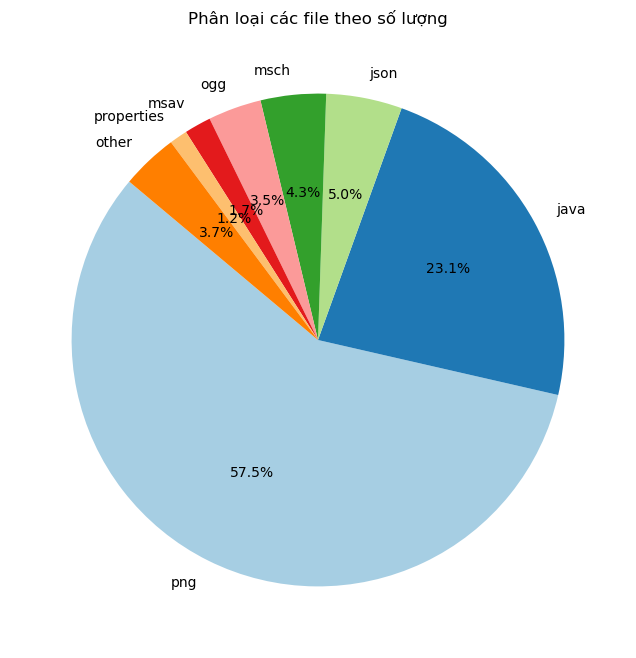

In [183]:
file_extension_counts_revised_df = pd.read_csv('data_cleaned/file_extension_counts_revised.csv')

# Vẽ biểu đồ quạt theo số lượng files
plt.figure(figsize=(10, 8))
plt.pie(file_extension_counts_revised_df['count'], labels=file_extension_counts_revised_df['extension'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Phân loại các file theo số lượng')
plt.show()

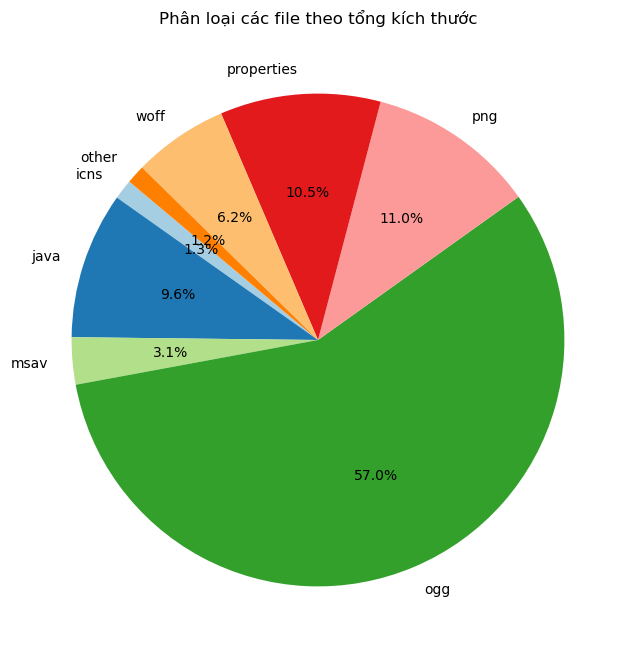

In [181]:
file_extension_sizes_revised_df = pd.read_csv('data_cleaned/file_extension_sizes_revised.csv')
# Vẽ biểu đồ quạt theo tổng kích thước files
plt.figure(figsize=(10, 8))
plt.pie(file_extension_sizes_revised_df['size'], labels=file_extension_sizes_revised_df['extension'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Phân loại các file theo tổng kích thước')
plt.show()

ANALYSIS OF README

In [ ]:
# nothing here

ANALYSIS OF GROWTH

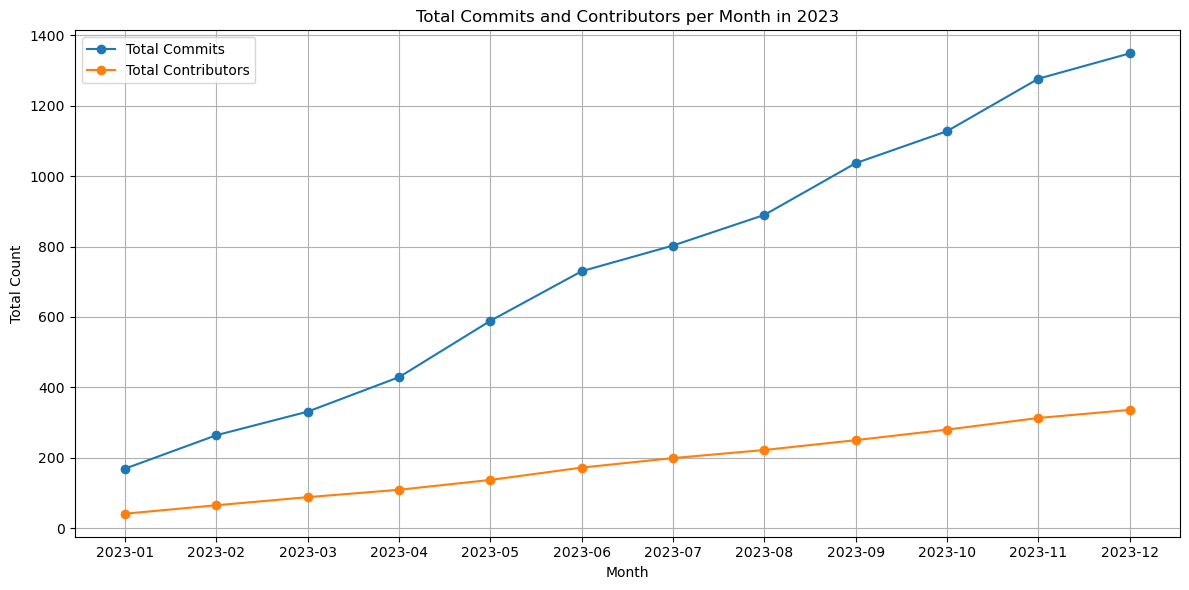

In [164]:
data = pd.read_csv('data_cleaned/growth.csv', index_col='month')
plt.figure(figsize=(12, 6))
plt.plot(data.index.astype(str), data['Total Commits'], marker='o', label='Total Commits')
plt.plot(data.index.astype(str), data['Total Contributors'], marker='o', label='Total Contributors')

plt.title('Total Commits and Contributors per Month in 2023')
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

ANALYSIS OF NETWORK

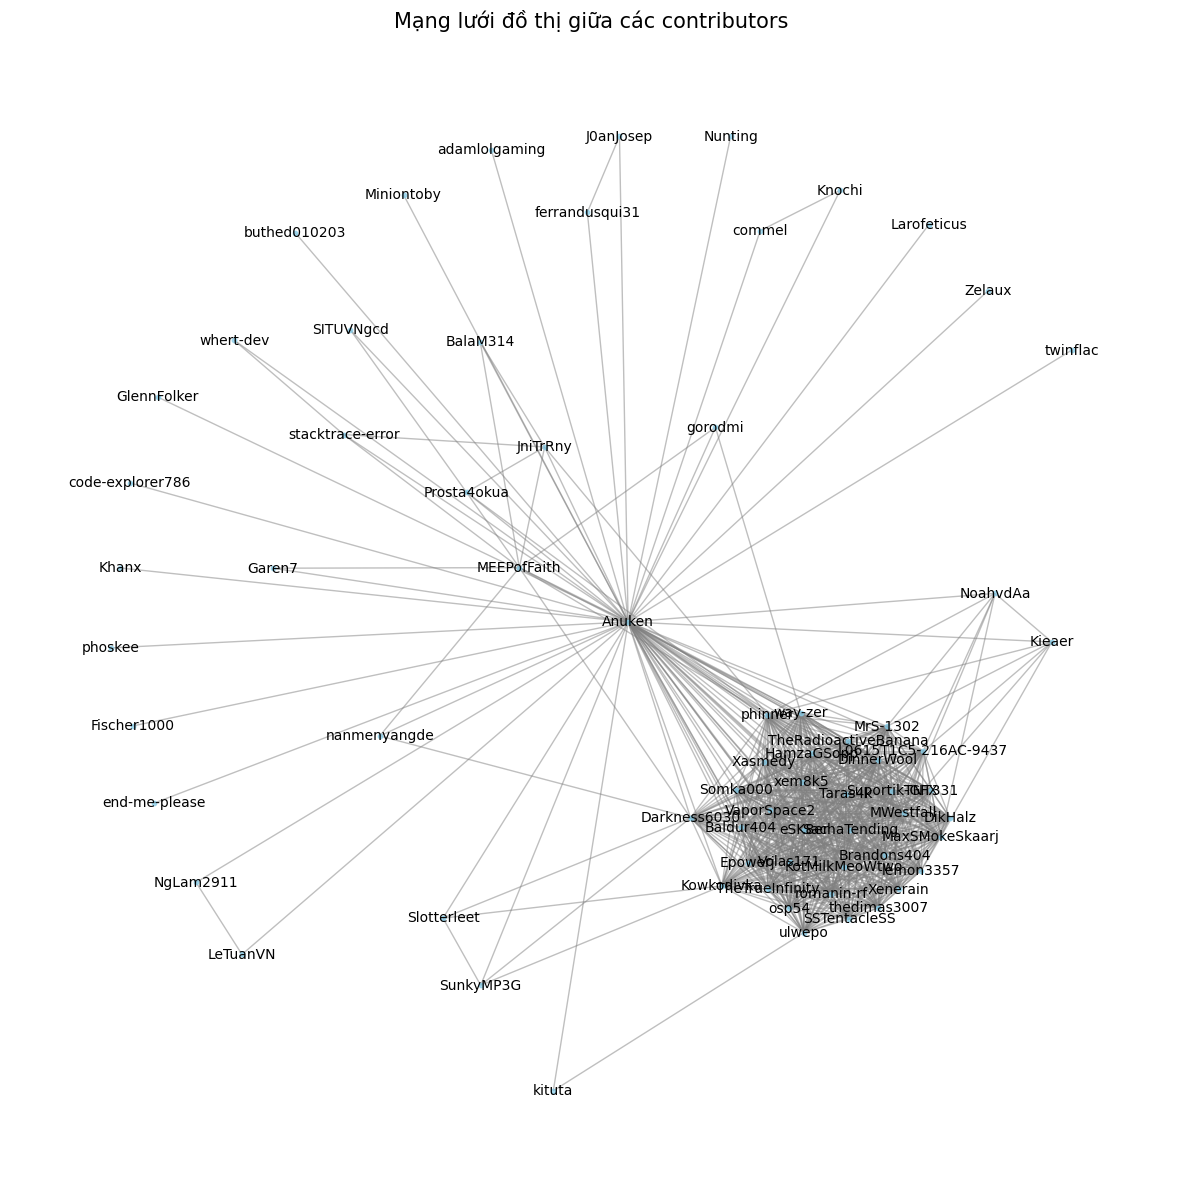

In [163]:
edges_df = pd.read_csv('data_cleaned/network_edges.csv')
# Tạo đối tượng đồ thị
G = nx.Graph()

# Thêm các edges vào đồ thị
for _, row in edges_df.iterrows():
    G.add_edge(row['source'], row['target'])

plt.figure(figsize=(15, 15))
#pos = nx.kamada_kawai_layout(G)
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos, width=[1 for (u, v, d) in G.edges(data=True)], alpha=0.5, edge_color='grey')
nodes = nx.draw_networkx_nodes(G, pos, node_size=10, node_color='skyblue', alpha=0.7)
labels = nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.title('Mạng lưới đồ thị giữa các contributors', fontsize=15)
plt.axis('off')
plt.show()